In [14]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly



In [2]:
# Load the data
data = pd.read_csv('../Data Source/combined.csv')



In [3]:
# Preprocess the data
data['ds'] = pd.to_datetime(data['Year'], format='%Y')
data['y'] = data['Total Primary Energy Consumption']

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]



In [4]:
# Train the Prophet model
model = Prophet()
model.fit(train_data)



09:38:24 - cmdstanpy - INFO - Chain [1] start processing
09:38:25 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# Make predictions for the test set
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)



Mean Squared Error: 104842.72
Predicted energy consumption for the next 30 days:
0      86.941079
1      87.888495
2      89.408877
3      90.297122
4      90.671515
5      91.618931
6      93.139314
7      94.027559
8      94.401952
9      95.349368
10     96.869750
11     97.757995
12     98.132388
13     99.079804
14    100.600187
15    101.488432
16    101.862825
17    102.810241
18    104.330624
19    105.218869
20    105.593262
21    106.540678
22    108.061060
23    108.949305
24    109.323698
25    110.271114
26    111.791497
27    112.679742
28    113.054135
29    114.001551
Name: yhat, dtype: float64


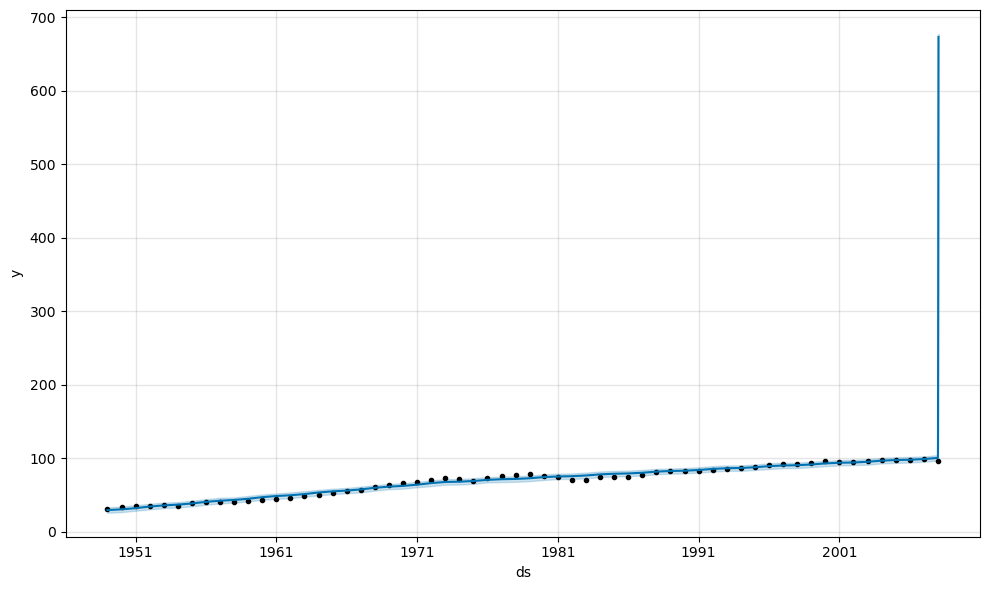

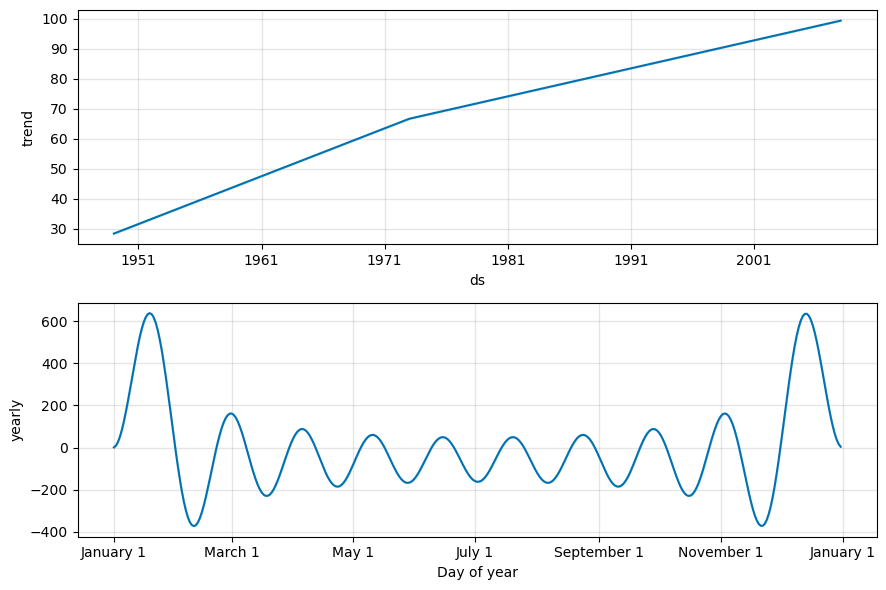

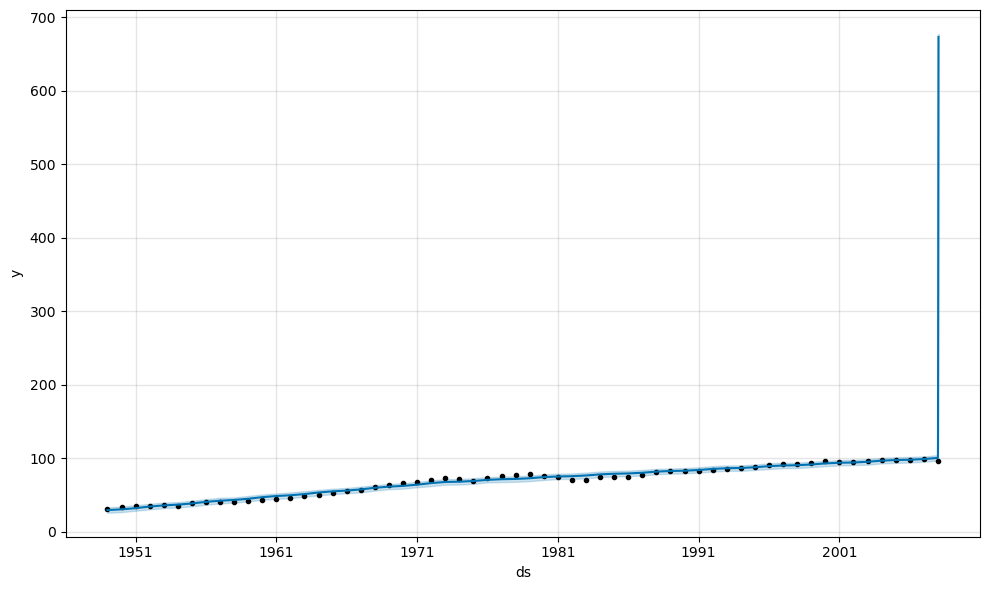

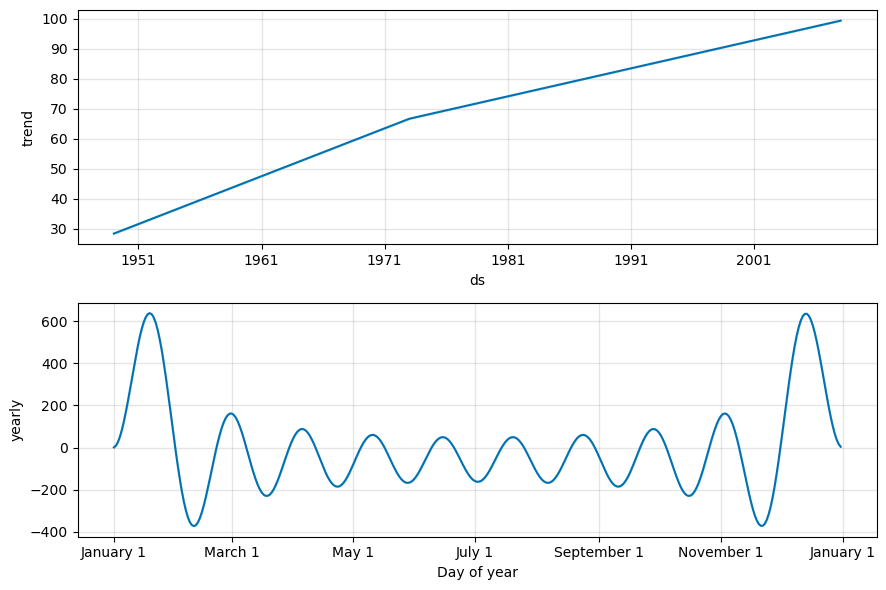

In [6]:
# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_data['y'], forecast['yhat'][-len(test_data):])
print(f"Mean Squared Error: {mse:.2f}")

# Plot the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

# Make predictions for the future
future_days = 30  # Predict for the next month
future_data = data.iloc[-future_days:].copy()
future_data['ds'] = pd.to_datetime(future_data['Year'], format='%Y')
future_forecast = model.predict(future_data)

print(f"Predicted energy consumption for the next {future_days} days:")
print(future_forecast['yhat'])

# Plot the forecast
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)

In [7]:
# Make predictions for the future
future_days = 30  # Predict for the next month
future_data = data.iloc[-future_days:].copy()
future_data['ds'] = pd.to_datetime(future_data['Year'], format='%Y')
future_forecast = model.predict(future_data)

print(f"Predicted energy consumption for the next {future_days} days:")
print(future_forecast['yhat'])

Predicted energy consumption for the next 30 days:
0      86.941079
1      87.888495
2      89.408877
3      90.297122
4      90.671515
5      91.618931
6      93.139314
7      94.027559
8      94.401952
9      95.349368
10     96.869750
11     97.757995
12     98.132388
13     99.079804
14    100.600187
15    101.488432
16    101.862825
17    102.810241
18    104.330624
19    105.218869
20    105.593262
21    106.540678
22    108.061060
23    108.949305
24    109.323698
25    110.271114
26    111.791497
27    112.679742
28    113.054135
29    114.001551
Name: yhat, dtype: float64


In [ ]:
#New code chatgpt

In [8]:
import pandas as pd

# Load the data
data = pd.read_csv("../Data Source/updated_combined.csv")

# Convert non-numeric values to NaN
data[['CSIRO - Adjusted sea level (inches)', 'NOAA - Adjusted sea level (inches)', 'Precipitation Change', 'Temperature Change (Celcius)']] = data[['CSIRO - Adjusted sea level (inches)', 'NOAA - Adjusted sea level (inches)', 'Precipitation Change', 'Temperature Change (Celcius)']].apply(pd.to_numeric, errors='coerce')

# Proceed with your analysis
# Your code for modeling, forecasting, and evaluation goes here

C:\Users\umesh\Amita-DataBC\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.5499
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2476
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0637
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0129
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0598
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0694
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0373
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0120 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0153
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0213
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0214
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0164 
Epoch 14/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0091 
Epoch 15/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0054 
Epoch 16/100
2/

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 83/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 84/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017
Epoch 85/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 86/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 87/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0018
Epoch 88/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017
Epoch 89/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0018
Epoch 90/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017
Epoch 91/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0017
Epoch 92/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0017
Epoch 93/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0017
Epoch 94/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0017
Epoch 95/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 96/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0017
Epoch 97/100
2/2 ━━━━━━

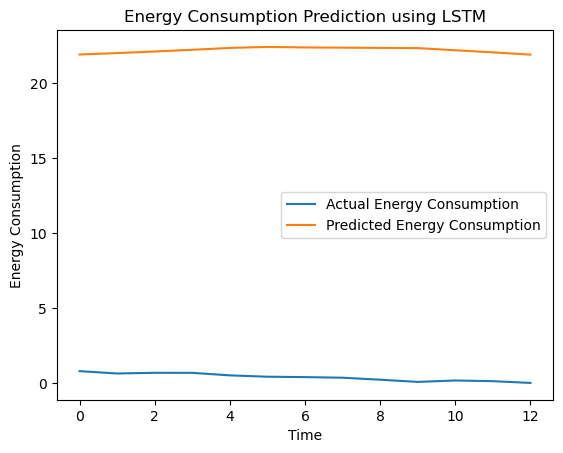

In [9]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
dataset = pd.read_csv('../Data Source/updated_combined.csv')

# Drop irrelevant columns
dataset.drop(['CSIRO - Adjusted sea level (inches)', 'NOAA - Adjusted sea level (inches)',
              'Precipitation Change'], axis=1, inplace=True)

# Convert 'Year' column to datetime format
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y')

# Set 'Year' column as index
dataset.set_index('Year', inplace=True)

# Check for missing values and fill them if any
if dataset.isnull().sum().any():
    dataset.fillna(method='ffill', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Function to create supervised learning dataset
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time steps for LSTM
time_steps = 12  # You can adjust this value as needed

# Create supervised learning dataset
X, y = create_dataset(scaled_data, time_step=time_steps)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape the input data for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], dataset.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], dataset.shape[1])

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], dataset.shape[1])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions
predictions = scaler.inverse_transform(np.hstack((predictions, np.zeros((predictions.shape[0], dataset.shape[1] - 1)))))[:, 0]

# Plot the results
plt.plot(y_test, label='Actual Energy Consumption')
plt.plot(predictions, label='Predicted Energy Consumption')
plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Prediction using LSTM')
plt.legend()
plt.show()


10:57:33 - cmdstanpy - INFO - Chain [1] start processing
10:57:34 - cmdstanpy - INFO - Chain [1] done processing


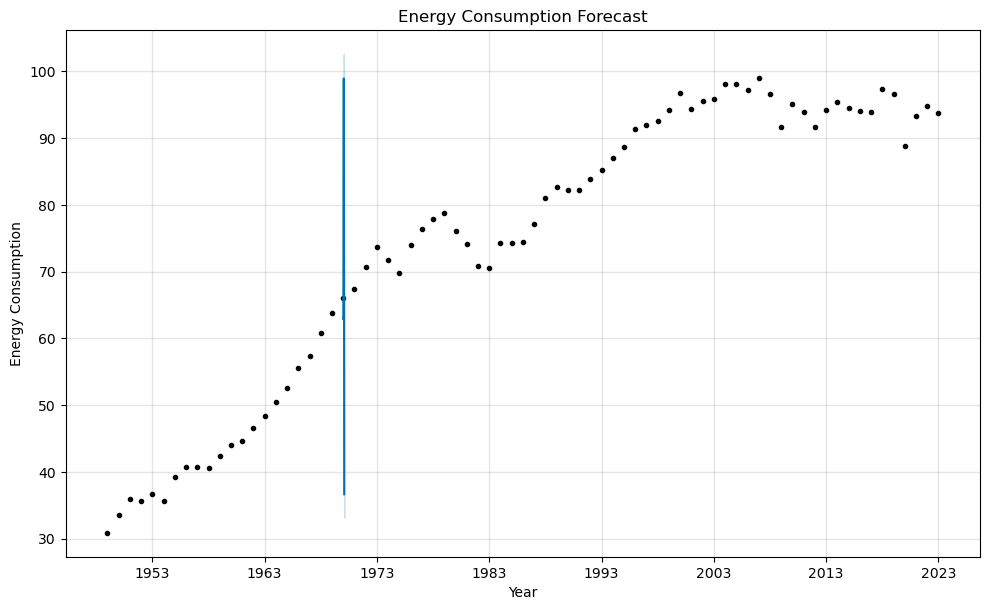

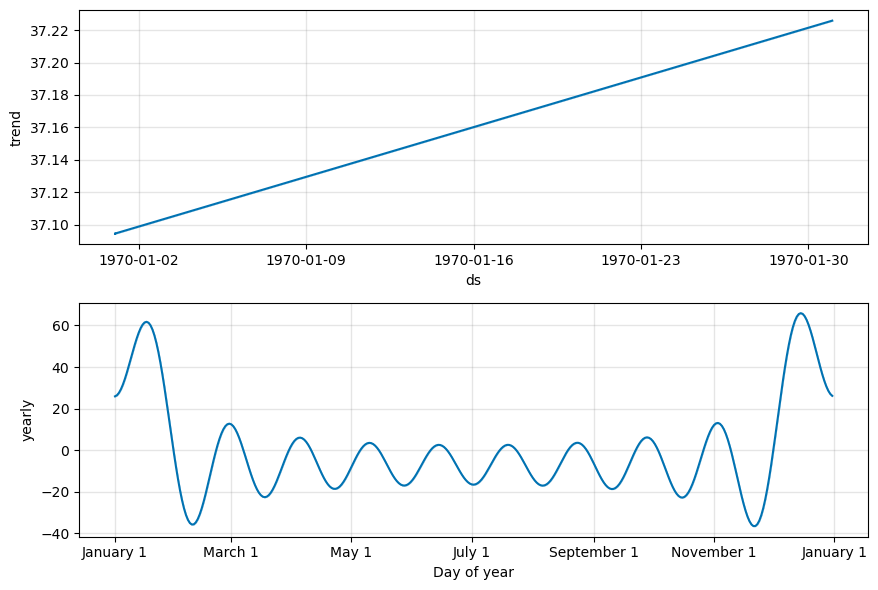

Predicted energy consumption for the next 30 days:
                               ds       yhat
75  1970-01-02 00:00:00.000002023  63.323902
76  1970-01-03 00:00:00.000002023  64.325777
77  1970-01-04 00:00:00.000002023  65.918293
78  1970-01-05 00:00:00.000002023  68.045590
79  1970-01-06 00:00:00.000002023  70.634255
80  1970-01-07 00:00:00.000002023  73.595411
81  1970-01-08 00:00:00.000002023  76.827237
82  1970-01-09 00:00:00.000002023  80.217862
83  1970-01-10 00:00:00.000002023  83.648525
84  1970-01-11 00:00:00.000002023  86.996941
85  1970-01-12 00:00:00.000002023  90.140764
86  1970-01-13 00:00:00.000002023  92.961050
87  1970-01-14 00:00:00.000002023  95.345642
88  1970-01-15 00:00:00.000002023  97.192350
89  1970-01-16 00:00:00.000002023  98.411877
90  1970-01-17 00:00:00.000002023  98.930382
91  1970-01-18 00:00:00.000002023  98.691617
92  1970-01-19 00:00:00.000002023  97.658591
93  1970-01-20 00:00:00.000002023  95.814701
94  1970-01-21 00:00:00.000002023  93.164299
95  

In [15]:


# Load the data
data = pd.read_csv("../Data Source/updated_combined.csv")

# Convert non-numeric values to NaN
data[['CSIRO - Adjusted sea level (inches)', 'NOAA - Adjusted sea level (inches)', 'Precipitation Change', 'Temperature Change (Celcius)']] = data[['CSIRO - Adjusted sea level (inches)', 'NOAA - Adjusted sea level (inches)', 'Precipitation Change', 'Temperature Change (Celcius)']].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
data.dropna(inplace=True)

# Rename columns for Prophet
data.rename(columns={'Year': 'ds', 'Total Primary Energy Consumption': 'y'}, inplace=True)

# Create a Prophet model
model = Prophet()

# Fit the model
model.fit(data)

# Make predictions for the future
future_days = 30  # Predict for the next 30 days
future = model.make_future_dataframe(periods=future_days, freq='D')

# Forecast
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Energy Consumption Forecast')
plt.show()

# Plot components
model.plot_components(forecast)
plt.show()

# Print the forecast for the next 30 days
print(f"Predicted energy consumption for the next {future_days} days:")
print(forecast[['ds', 'yhat']].tail(future_days))


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Assuming y_true contains the actual values and y_pred contains the predicted values
y_true = test_data['y']  # Actual values
y_pred = forecast['yhat'][-len(test_data):]  # Predicted values

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 16.24
Mean Squared Error (MSE): 387.05
Root Mean Squared Error (RMSE): 19.67


In [ ]:
#final new model--

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('../Data Source/combined.csv')

# Select the relevant features for the hypothesis (temperature change and total primary energy consumption)
X = data[['Temperature Change (Celcius)']]
y = data['Total Primary Energy Consumption']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)


Mean Squared Error: 384.6836256645376
R-squared Score: 0.2973056850934257
Intercept: 68.23901121804542
Coefficient: [22.00365943]


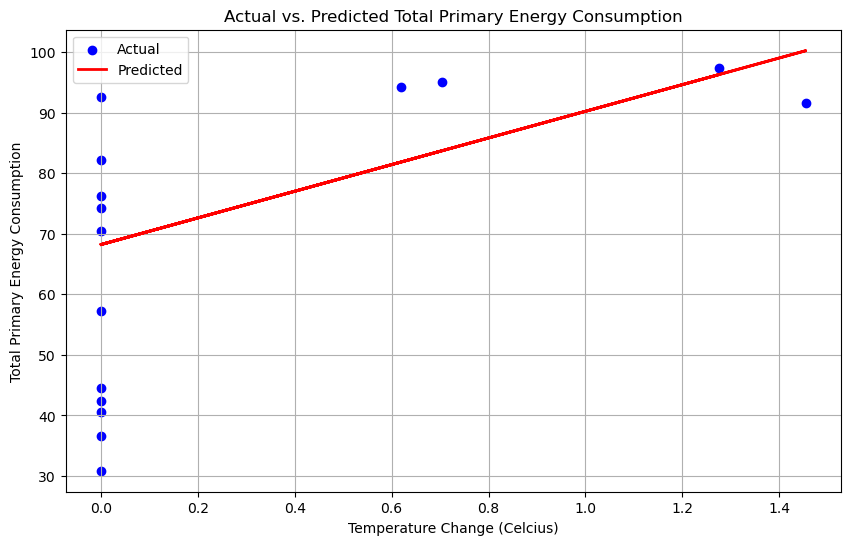

In [27]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs. Predicted Total Primary Energy Consumption')
plt.xlabel('Temperature Change (Celcius)')
plt.ylabel('Total Primary Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()


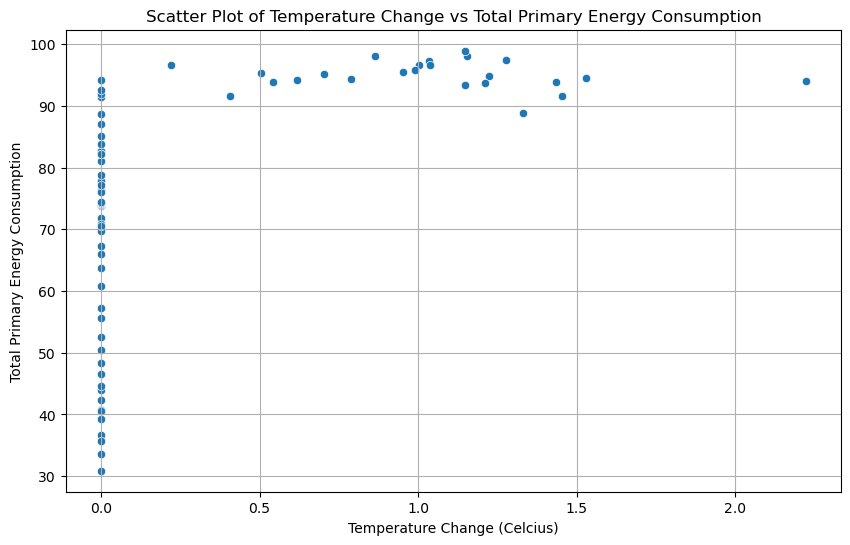

Correlation Coefficient: 0.6014814305119793
p-value: 1.1516024295221808e-08
Reject the null hypothesis. There is a statistically significant relationship between total primary energy consumption and temperature change.


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset
df = pd.read_csv('../Data Source/combined.csv')

# Data Visualization

# Scatter plot between 'Temperature Change (Celcius)' and 'Total Primary Energy Consumption'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature Change (Celcius)', y='Total Primary Energy Consumption')
plt.title('Scatter Plot of Temperature Change vs Total Primary Energy Consumption')
plt.xlabel('Temperature Change (Celcius)')
plt.ylabel('Total Primary Energy Consumption')
plt.grid(True)
plt.show()

# Statistical Analysis

# Correlation analysis
correlation_coefficient, p_value = pearsonr(df['Temperature Change (Celcius)'], df['Total Primary Energy Consumption'])
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'p-value: {p_value}')

# Hypothesis testing
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant relationship between total primary energy consumption and temperature change.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant relationship between total primary energy consumption and temperature change.")


In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('../Data Source/combined.csv')

# Extracting the predictor (X) and target (y) variables
X = data[['Temperature Change (Celcius)']]
y = data['Total Primary Energy Consumption']

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating R-squared score
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 384.6836256645376
R-squared Score: 0.2973056850934257
